In [1]:
#Import Dependencies
from pylab import *
import os
import pandas as pd
import librosa
import librosa.display
import glob
import random
from IPython.display import Audio
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
import tensorflow
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv1D,MaxPooling1D, BatchNormalization
from tensorflow.keras.regularizers import l2
import h5py
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import load_model

In [2]:
!pip install import-ipynb
import import_ipynb

In [3]:
from ClassesSpeechEmotion import *

importing Jupyter notebook from ClassesSpeechEmotion.ipynb


##### Get and preprosses datasets

In [4]:
obj = SpeechEmotion()
# RAVDASS AUDIO SET
file_name_df = obj.get_data("data/emotion_speech/.", 'emotion_speech')
file_name_df

,file_name,encoding,ID,dir
0,03-01-01-01-01-01-01.wav,03-01-01-01-01-01-01.wav,0,emotion_speech
1,03-01-01-01-01-01-02.wav,03-01-01-01-01-01-02.wav,1,emotion_speech
2,03-01-01-01-01-01-03.wav,03-01-01-01-01-01-03.wav,2,emotion_speech
3,03-01-01-01-01-01-04.wav,03-01-01-01-01-01-04.wav,3,emotion_speech
4,03-01-01-01-01-01-05.wav,03-01-01-01-01-01-05.wav,4,emotion_speech
...,...,...,...,...
1435,03-01-08-02-02-02-20.wav,03-01-08-02-02-02-20.wav,1435,emotion_speech
1436,03-01-08-02-02-02-21.wav,03-01-08-02-02-02-21.wav,1436,emotion_speech
1437,03-01-08-02-02-02-22.wav,03-01-08-02-02-02-22.wav,1437,emotion_speech
1438,03-01-08-02-02-02-23.wav,03-01-08-02-02-02-23.wav,1438,emotion_speech


In [5]:
ddf = obj.fix_ravdass_data(file_name_df)
ddf

,file_name,ID,dir,Class,Emotion
0,03-01-01-01-01-01-01.wav,0,emotion_speech,01,neutral
1,03-01-01-01-01-01-02.wav,1,emotion_speech,01,neutral
2,03-01-01-01-01-01-03.wav,2,emotion_speech,01,neutral
3,03-01-01-01-01-01-04.wav,3,emotion_speech,01,neutral
4,03-01-01-01-01-01-05.wav,4,emotion_speech,01,neutral
...,...,...,...,...,...
1435,03-01-08-02-02-02-20.wav,1435,emotion_speech,08,surprise
1436,03-01-08-02-02-02-21.wav,1436,emotion_speech,08,surprise
1437,03-01-08-02-02-02-22.wav,1437,emotion_speech,08,surprise
1438,03-01-08-02-02-02-23.wav,1438,emotion_speech,08,surprise


In [6]:
# TORONTO EMOTIONAL SPEECH DATASET
t_file_name_df = obj.get_data("data/toronto_speech/.", "toronto_speech")
ddf2 = obj.fix_toronto_data(t_file_name_df)
ddf2

,file_name,dir,Class,Emotion,ID
0,OAF_back_angry.wav,toronto_speech,05,angry,0
1,OAF_back_disgust.wav,toronto_speech,07,disgust,1
2,OAF_back_fear.wav,toronto_speech,06,fearful,2
3,OAF_back_happy.wav,toronto_speech,03,happy,3
4,OAF_back_neutral.wav,toronto_speech,01,neutral,4
...,...,...,...,...,...
2795,YAF_youth_fear.wav,toronto_speech,06,fearful,2795
2796,YAF_youth_happy.wav,toronto_speech,03,happy,2796
2797,YAF_youth_neutral.wav,toronto_speech,01,neutral,2797
2798,YAF_youth_ps.wav,toronto_speech,08,surprise,2798


In [7]:
final_dataset_df = obj.conact_dataset_and_reset_index(ddf, ddf2)
final_dataset_df

,file_name,ID,dir,Class,Emotion
0,03-01-01-01-01-01-01.wav,0,emotion_speech,01,neutral
1,03-01-01-01-01-01-02.wav,1,emotion_speech,01,neutral
2,03-01-01-01-01-01-03.wav,2,emotion_speech,01,neutral
3,03-01-01-01-01-01-04.wav,3,emotion_speech,01,neutral
4,03-01-01-01-01-01-05.wav,4,emotion_speech,01,neutral
...,...,...,...,...,...
4235,YAF_youth_fear.wav,4235,toronto_speech,06,fearful
4236,YAF_youth_happy.wav,4236,toronto_speech,03,happy
4237,YAF_youth_neutral.wav,4237,toronto_speech,01,neutral
4238,YAF_youth_ps.wav,4238,toronto_speech,08,surprise


##### Sample one audio File

C:\anaconda39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


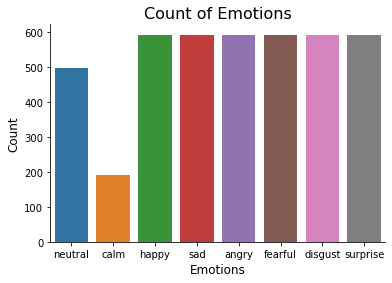

In [8]:
plt.title('Count of Emotions', size=16)
sns.countplot(final_dataset_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

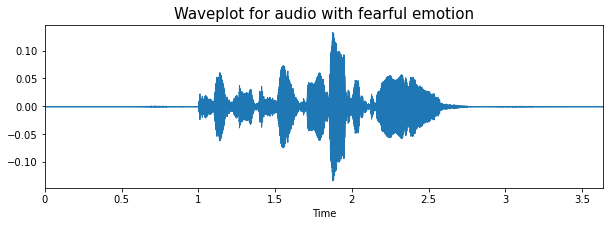

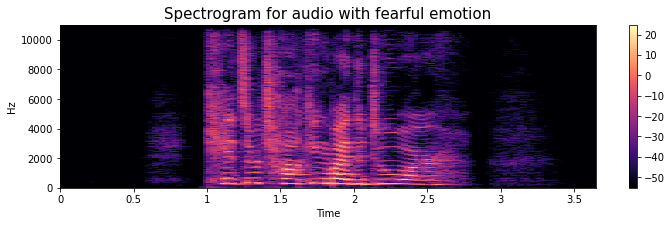

In [10]:
emotion='fearful'
path = np.array(final_dataset_df.file_name[final_dataset_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load('data/emotion_speech/'+path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio('data/emotion_speech/'+path)

##### Feature Data

In [11]:
obj.save_csv('data/voice_feature_data.csv', final_dataset_df, True)
train = obj.read_csv('data/voice_feature_data.csv')
train

,Unnamed: 0,file_name,ID,dir,Class,Emotion
0,0,03-01-01-01-01-01-01.wav,0,emotion_speech,1,neutral
1,1,03-01-01-01-01-01-02.wav,1,emotion_speech,1,neutral
2,2,03-01-01-01-01-01-03.wav,2,emotion_speech,1,neutral
3,3,03-01-01-01-01-01-04.wav,3,emotion_speech,1,neutral
4,4,03-01-01-01-01-01-05.wav,4,emotion_speech,1,neutral
...,...,...,...,...,...,...
4235,4235,YAF_youth_fear.wav,4235,toronto_speech,6,fearful
4236,4236,YAF_youth_happy.wav,4236,toronto_speech,3,happy
4237,4237,YAF_youth_neutral.wav,4237,toronto_speech,1,neutral
4238,4238,YAF_youth_ps.wav,4238,toronto_speech,8,surprise


In [12]:
temp = train.apply(obj.parser, axis=1)

In [13]:
features_df = pd.DataFrame(data=[x[0] for x in temp])
features_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-700.398926,58.630211,-3.025852,16.040241,4.248529,3.869935,-6.381716,-0.188635,-13.735004,-0.319724,...,-0.048826,-0.009966,0.043364,-0.118930,0.086474,0.020726,-0.009119,0.028229,0.139806,-0.038748
1,-653.169006,58.028076,-12.581207,11.818786,-7.681562,-0.617142,-8.337758,-5.823570,-6.547592,1.458057,...,-0.151122,0.047958,-0.441313,-0.270397,-0.072456,-0.126832,0.204340,0.047925,-0.173506,0.012698
2,-617.052307,60.103363,-5.984258,13.886285,1.120427,0.511750,-14.841358,-4.016369,-5.575839,-6.309851,...,0.002693,0.189555,0.018517,0.039327,0.347483,0.340563,0.208704,-0.167646,0.078711,-0.066652
3,-698.721130,47.088486,-11.333612,12.963089,-8.005651,-1.252229,-10.009067,-9.434125,-10.318875,-0.864674,...,-0.421341,0.171895,-0.238024,-0.276562,-0.140813,0.068313,-0.155587,-0.085290,-0.532761,-0.309993
4,-715.922607,71.976791,4.457525,18.602497,8.404046,3.621954,-1.974365,0.022673,-2.678084,4.232803,...,0.384698,-0.165444,-0.215464,0.402756,0.292296,-0.007742,0.232237,-0.152113,-0.026279,0.499299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-343.403870,32.597549,-9.197988,25.315773,0.052861,0.853997,-11.733653,0.140329,-25.528193,4.334096,...,-0.249190,-0.409718,-1.485379,-0.214704,-0.102036,-0.255547,-0.547902,-0.108608,-0.397968,-0.181329
4236,-345.477142,24.427334,-14.398651,36.952991,-7.297602,1.008584,-15.700942,-10.525763,-6.183089,-6.078100,...,-0.159584,0.262729,-0.566107,-0.328712,0.148458,-0.178414,-0.116418,-0.090460,-0.322620,-0.380512
4237,-416.726318,71.149239,-1.116021,42.524796,-6.296183,2.258822,-6.628645,-7.701837,-10.190815,7.239936,...,0.438560,0.677458,0.412472,1.938057,1.621955,0.710130,1.050725,-0.171473,-1.331136,0.121676
4238,-374.824036,46.681873,-12.381617,18.139082,-22.662426,4.170814,-15.546303,-7.580998,-18.976576,6.013675,...,-0.561243,0.262933,0.197717,0.040197,-0.191408,0.221918,-0.348762,-0.375392,0.047249,-0.005718


In [14]:
features_df["label"] = [x[1] for x in temp]
features_df["emotions"] = [x[2] for x in temp]

In [15]:
#Write to CSV
obj.save_csv('data/emotion_data.csv', features_df, False)

In [16]:
df =obj.read_csv('data/emotion_data.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,label,emotions
0,-700.398926,58.630211,-3.025852,16.040241,4.248529,3.869935,-6.381716,-0.188635,-13.735004,-0.319724,...,0.043364,-0.118930,0.086474,0.020726,-0.009119,0.028229,0.139806,-0.038748,1,neutral
1,-653.169006,58.028076,-12.581207,11.818786,-7.681562,-0.617142,-8.337758,-5.823570,-6.547592,1.458057,...,-0.441313,-0.270397,-0.072456,-0.126832,0.204340,0.047925,-0.173506,0.012698,1,neutral
2,-617.052307,60.103363,-5.984258,13.886285,1.120427,0.511750,-14.841358,-4.016369,-5.575839,-6.309851,...,0.018517,0.039327,0.347483,0.340563,0.208704,-0.167646,0.078711,-0.066652,1,neutral
3,-698.721130,47.088486,-11.333612,12.963089,-8.005651,-1.252229,-10.009067,-9.434125,-10.318875,-0.864674,...,-0.238024,-0.276562,-0.140813,0.068313,-0.155587,-0.085290,-0.532761,-0.309993,1,neutral
4,-715.922607,71.976791,4.457525,18.602497,8.404046,3.621954,-1.974365,0.022673,-2.678084,4.232803,...,-0.215464,0.402756,0.292296,-0.007742,0.232237,-0.152113,-0.026279,0.499299,1,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-343.403870,32.597549,-9.197988,25.315773,0.052861,0.853997,-11.733653,0.140329,-25.528193,4.334096,...,-1.485379,-0.214704,-0.102036,-0.255547,-0.547902,-0.108608,-0.397968,-0.181329,6,fearful
4236,-345.477142,24.427334,-14.398651,36.952991,-7.297602,1.008584,-15.700942,-10.525763,-6.183089,-6.078100,...,-0.566107,-0.328712,0.148458,-0.178414,-0.116418,-0.090460,-0.322620,-0.380512,3,happy
4237,-416.726318,71.149239,-1.116021,42.524796,-6.296183,2.258822,-6.628645,-7.701837,-10.190815,7.239936,...,0.412472,1.938057,1.621955,0.710130,1.050725,-0.171473,-1.331136,0.121676,1,neutral
4238,-374.824036,46.681873,-12.381617,18.139082,-22.662426,4.170814,-15.546303,-7.580998,-18.976576,6.013675,...,0.197717,0.040197,-0.191408,0.221918,-0.348762,-0.375392,0.047249,-0.005718,8,surprise


In [17]:
df.drop(inplace=True, columns=["label"])
target = df["emotions"]
data = df.drop("emotions", axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-700.398926,58.630211,-3.025852,16.040241,4.248529,3.869935,-6.381716,-0.188635,-13.735004,-0.319724,...,-0.048826,-0.009966,0.043364,-0.118930,0.086474,0.020726,-0.009119,0.028229,0.139806,-0.038748
1,-653.169006,58.028076,-12.581207,11.818786,-7.681562,-0.617142,-8.337758,-5.823570,-6.547592,1.458057,...,-0.151122,0.047958,-0.441313,-0.270397,-0.072456,-0.126832,0.204340,0.047925,-0.173506,0.012698
2,-617.052307,60.103363,-5.984258,13.886285,1.120427,0.511750,-14.841358,-4.016369,-5.575839,-6.309851,...,0.002693,0.189555,0.018517,0.039327,0.347483,0.340563,0.208704,-0.167646,0.078711,-0.066652
3,-698.721130,47.088486,-11.333612,12.963089,-8.005651,-1.252229,-10.009067,-9.434125,-10.318875,-0.864674,...,-0.421341,0.171895,-0.238024,-0.276562,-0.140813,0.068313,-0.155587,-0.085290,-0.532761,-0.309993
4,-715.922607,71.976791,4.457525,18.602497,8.404046,3.621954,-1.974365,0.022673,-2.678084,4.232803,...,0.384698,-0.165444,-0.215464,0.402756,0.292296,-0.007742,0.232237,-0.152113,-0.026279,0.499299


##### Models

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [19]:
obj_model = Models()
X_train_scaled, X_test_scaled = obj_model.convert_data_to_scaler(X_train, X_test, 'models/scaler.sav')  

In [20]:
X_train_scaled.shape

(3180, 128)

##### RandomForestClassifier

In [21]:
exp = ['neutral','calm','happy','sad','angry','fearful','disgust','surprise']

Accuracy Classifier: 81.79%
              precision    recall  f1-score   support

       angry       0.90      0.83      0.86       144
        calm       0.57      0.88      0.69        52
     disgust       0.72      0.87      0.78       166
     fearful       0.87      0.85      0.86       147
       happy       0.91      0.71      0.80       151
     neutral       1.00      0.79      0.88       115
         sad       0.83      0.79      0.81       137
    surprise       0.78      0.85      0.82       148

    accuracy                           0.82      1060
   macro avg       0.82      0.82      0.81      1060
weighted avg       0.84      0.82      0.82      1060



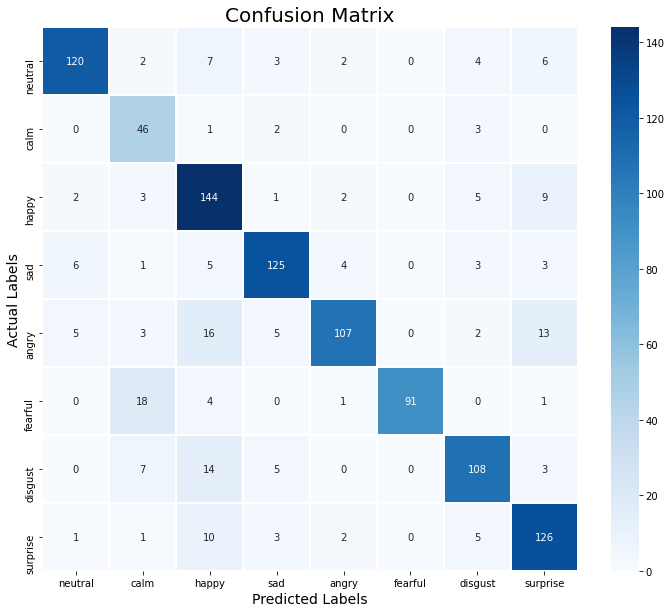

In [22]:
clf = obj_model.random_forest_classifier(X_train_scaled, y_train)
obj_model.model_evaluation(clf, X_test_scaled, y_test, exp)
obj_model.save_classifier(clf, 'models/RandomForestClassifier_model.sav')

##### DecisionTreeClassifier

Accuracy Classifier: 69.25%
              precision    recall  f1-score   support

       angry       0.69      0.75      0.72       144
        calm       0.43      0.46      0.44        52
     disgust       0.75      0.72      0.73       166
     fearful       0.70      0.71      0.71       147
       happy       0.67      0.61      0.64       151
     neutral       0.83      0.78      0.81       115
         sad       0.73      0.73      0.73       137
    surprise       0.62      0.65      0.63       148

    accuracy                           0.69      1060
   macro avg       0.68      0.68      0.68      1060
weighted avg       0.69      0.69      0.69      1060



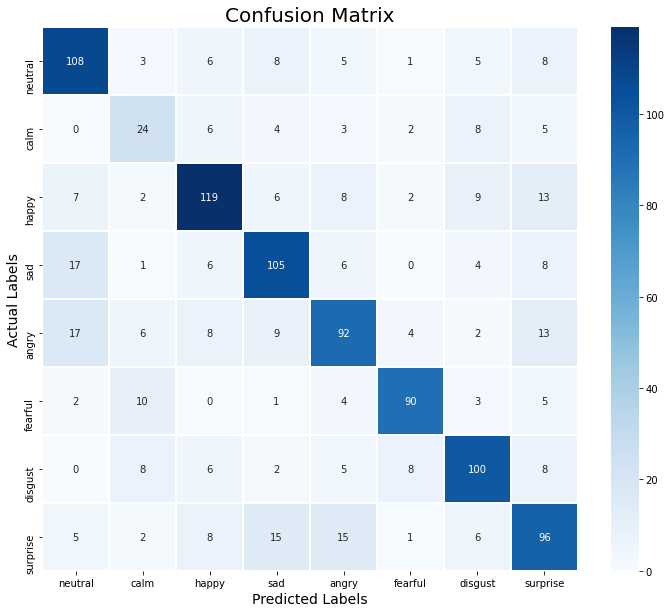

In [23]:
clf = obj_model.decision_tree_classifier(X_train_scaled, y_train)
obj_model.model_evaluation(clf, X_test_scaled, y_test, exp)
obj_model.save_classifier(clf, 'models/DecisionTreeClassifier_emotion_model.sav')

##### KNeighborsClassifier

Accuracy Classifier: 79.62%
              precision    recall  f1-score   support

       angry       0.72      0.84      0.77       144
        calm       0.67      0.63      0.65        52
     disgust       0.78      0.86      0.81       166
     fearful       0.87      0.76      0.81       147
       happy       0.81      0.71      0.76       151
     neutral       0.94      0.80      0.86       115
         sad       0.88      0.76      0.82       137
    surprise       0.73      0.91      0.81       148

    accuracy                           0.80      1060
   macro avg       0.80      0.78      0.79      1060
weighted avg       0.81      0.80      0.80      1060



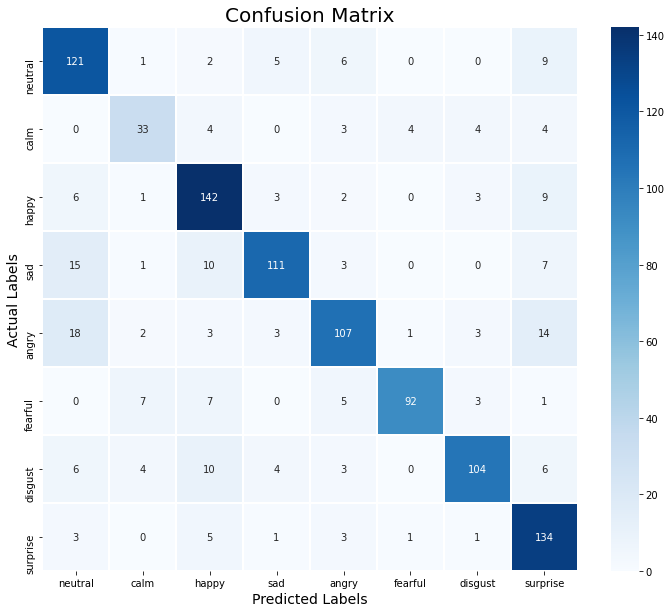

In [24]:
clf = obj_model.knn_classifier(X_train_scaled, y_train)
obj_model.model_evaluation(clf, X_test_scaled, y_test, exp)
obj_model.save_classifier(clf, 'models/KNeighborsClassifier_emotion_model.sav')

##### SVCclassifier

Accuracy Classifier: 80.94%
              precision    recall  f1-score   support

       angry       0.87      0.86      0.86       144
        calm       0.57      0.77      0.66        52
     disgust       0.72      0.87      0.79       166
     fearful       0.83      0.82      0.83       147
       happy       0.91      0.67      0.77       151
     neutral       0.99      0.77      0.86       115
         sad       0.79      0.83      0.81       137
    surprise       0.80      0.84      0.82       148

    accuracy                           0.81      1060
   macro avg       0.81      0.80      0.80      1060
weighted avg       0.82      0.81      0.81      1060



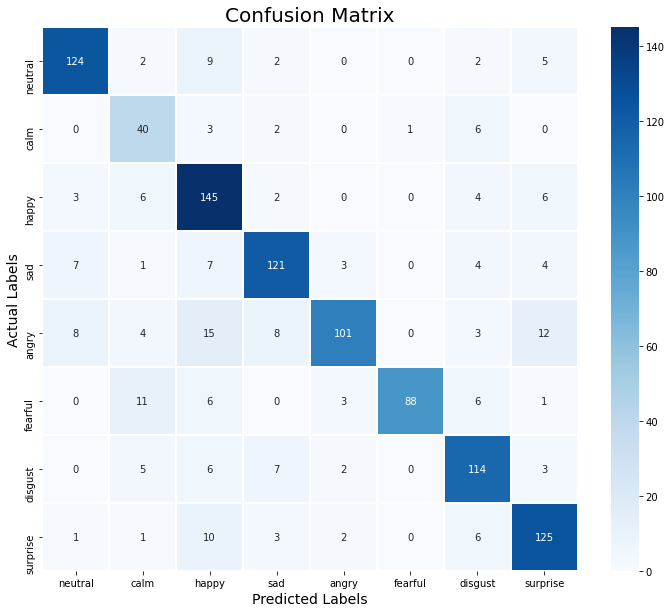

In [25]:
clf = obj_model.svc_classifier(X_train_scaled, y_train)
obj_model.model_evaluation(clf, X_test_scaled, y_test, exp)
obj_model.save_classifier(clf, 'models/SVCclassifier_emotion_model.sav')

##### Deep Learning 

In [26]:
# One hot lables
encoder, y_train_oneHot, y_test_oneHot = obj_model.one_hot(y_train, y_test)
# Callbacks
F1 = F1(X_train_scaled, y_train_oneHot,X_test_scaled,y_test_oneHot)
mc = ModelCheckpoint('models/best_model.h5', monitor= 'f1_score') 
callback = tf.keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
all= [F1,mc]
# Create model
model = obj_model.get_model( y_train_oneHot, X_train_scaled)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 100,872
Trainable params: 100,872
Non-trainable params: 0
_________________________________________________________________


C:\anaconda39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [27]:
history = obj_model.fit_model(model, X_train_scaled, y_train_oneHot, X_test_scaled,y_test_oneHot, all)

Epoch 1/140
100/100 [==============================] - 1s 6ms/step - loss: 21.2389 - accuracy: 0.2701 - val_loss: 19.2288 - val_accuracy: 0.4962
Epoch 2/140
100/100 [==============================] - 0s 3ms/step - loss: 17.4526 - accuracy: 0.5145 - val_loss: 15.7134 - val_accuracy: 0.6019
Epoch 3/140
100/100 [==============================] - 0s 4ms/step - loss: 14.1272 - accuracy: 0.6041 - val_loss: 12.6166 - val_accuracy: 0.6519
Epoch 4/140
100/100 [==============================] - 0s 4ms/step - loss: 11.2463 - accuracy: 0.6632 - val_loss: 9.9788 - val_accuracy: 0.6632
Epoch 5/140
100/100 [==============================] - 0s 4ms/step - loss: 8.8151 - accuracy: 0.6903 - val_loss: 7.7833 - val_accuracy: 0.6792
Epoch 6/140
100/100 [==============================] - 0s 4ms/step - loss: 6.8226 - accuracy: 0.7097 - val_loss: 6.0080 - val_accuracy: 0.6849
Epoch 7/140
100/100 [==============================] - 0s 4ms/step - loss: 5.2341 - accuracy: 0.7186 - val_loss: 4.6105 - val_accuracy:

Epoch 35/140
100/100 [==============================] - 0s 4ms/step - loss: 0.9476 - accuracy: 0.7991 - val_loss: 1.0315 - val_accuracy: 0.7500
Epoch 36/140
100/100 [==============================] - 0s 4ms/step - loss: 0.9410 - accuracy: 0.7981 - val_loss: 1.0275 - val_accuracy: 0.7491
Epoch 37/140
100/100 [==============================] - 0s 4ms/step - loss: 0.9402 - accuracy: 0.7984 - val_loss: 1.0244 - val_accuracy: 0.7509
Epoch 38/140
100/100 [==============================] - 0s 4ms/step - loss: 0.9314 - accuracy: 0.8050 - val_loss: 1.0197 - val_accuracy: 0.7538
Epoch 39/140
100/100 [==============================] - 0s 4ms/step - loss: 0.9265 - accuracy: 0.8047 - val_loss: 1.0150 - val_accuracy: 0.7575
Epoch 40/140
100/100 [==============================] - 0s 5ms/step - loss: 0.9224 - accuracy: 0.8047 - val_loss: 1.0074 - val_accuracy: 0.7613
Epoch 41/140
100/100 [==============================] - 0s 5ms/step - loss: 0.9122 - accuracy: 0.8079 - val_loss: 1.0018 - val_accuracy:

Epoch 69/140
100/100 [==============================] - 0s 4ms/step - loss: 0.8167 - accuracy: 0.8327 - val_loss: 0.9168 - val_accuracy: 0.7764
Epoch 70/140
100/100 [==============================] - 0s 5ms/step - loss: 0.8126 - accuracy: 0.8267 - val_loss: 0.9141 - val_accuracy: 0.7783
Epoch 71/140
100/100 [==============================] - 0s 4ms/step - loss: 0.8134 - accuracy: 0.8327 - val_loss: 0.9138 - val_accuracy: 0.7736
Epoch 72/140
100/100 [==============================] - 0s 5ms/step - loss: 0.8132 - accuracy: 0.8289 - val_loss: 0.9094 - val_accuracy: 0.7802
Epoch 73/140
100/100 [==============================] - 0s 5ms/step - loss: 0.8093 - accuracy: 0.8292 - val_loss: 0.9046 - val_accuracy: 0.7840
Epoch 74/140
100/100 [==============================] - 0s 5ms/step - loss: 0.8062 - accuracy: 0.8270 - val_loss: 0.9023 - val_accuracy: 0.7858
Epoch 75/140
100/100 [==============================] - 0s 5ms/step - loss: 0.8034 - accuracy: 0.8343 - val_loss: 0.9103 - val_accuracy:

Epoch 103/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7520 - accuracy: 0.8434 - val_loss: 0.8597 - val_accuracy: 0.7972
Epoch 104/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7493 - accuracy: 0.8443 - val_loss: 0.8574 - val_accuracy: 0.7915
Epoch 105/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7468 - accuracy: 0.8443 - val_loss: 0.8560 - val_accuracy: 0.7906
Epoch 106/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7464 - accuracy: 0.8481 - val_loss: 0.8575 - val_accuracy: 0.7877
Epoch 107/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7431 - accuracy: 0.8412 - val_loss: 0.8539 - val_accuracy: 0.8009
Epoch 108/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7421 - accuracy: 0.8478 - val_loss: 0.8525 - val_accuracy: 0.7981
Epoch 109/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7388 - accuracy: 0.8478 - val_loss: 0.8483 - val_ac

100/100 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.8582 - val_loss: 0.8188 - val_accuracy: 0.8028
Epoch 137/140
100/100 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.8588 - val_loss: 0.8273 - val_accuracy: 0.7953
Epoch 138/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.8569 - val_loss: 0.8230 - val_accuracy: 0.8038
Epoch 139/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7009 - accuracy: 0.8538 - val_loss: 0.8193 - val_accuracy: 0.8019
Epoch 140/140
100/100 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.8557 - val_loss: 0.8178 - val_accuracy: 0.8000


In [28]:
obj_model.save_model_and_history( model, history, "models/emotion_model.h5", 'models/emotion_model_history.npy')    

In [29]:
model, history = obj_model.load_model_and_history("models/emotion_model.h5", 'models/emotion_model_history.npy')

34/34 [==============================] - 0s 1ms/step - loss: 0.8178 - accuracy: 0.8000
Accuracy of our model on test data :  80.0000011920929 %


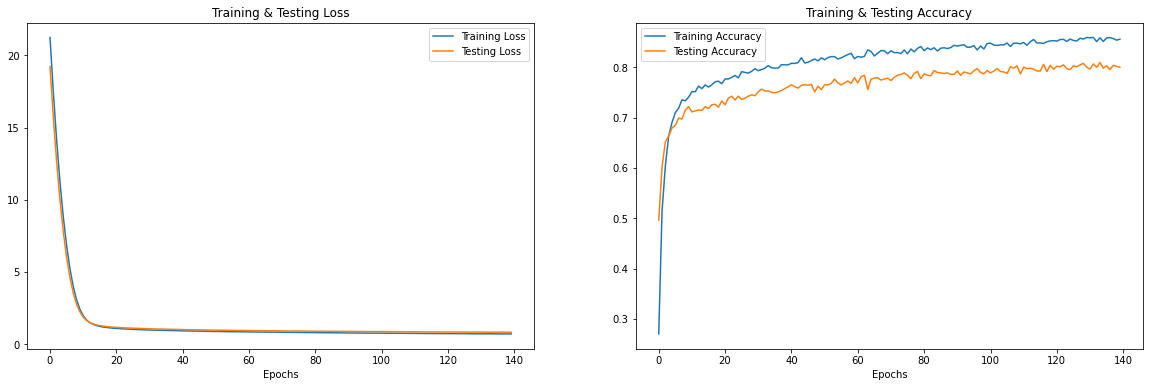

In [30]:
obj_model.show_loss_and_accuracy(model,history, X_test_scaled, y_test_oneHot)

In [31]:
df, y_pred, y_test = obj_model.test_predict(model, encoder, X_test_scaled, y_test_oneHot)
df.head(10)

,Predicted Labels,Actual Labels
0,angry,surprise
1,surprise,surprise
2,happy,happy
3,disgust,disgust
4,fearful,fearful
5,angry,angry
6,angry,angry
7,angry,angry
8,surprise,happy
9,calm,calm


Accuracy Classifier: 80.0%
              precision    recall  f1-score   support

       angry       0.78      0.85      0.82       144
        calm       0.49      0.73      0.58        52
     disgust       0.74      0.88      0.80       166
     fearful       0.83      0.79      0.81       147
       happy       0.89      0.72      0.79       151
     neutral       0.97      0.76      0.85       115
         sad       0.82      0.78      0.80       137
    surprise       0.84      0.83      0.84       148

    accuracy                           0.80      1060
   macro avg       0.79      0.79      0.79      1060
weighted avg       0.82      0.80      0.80      1060



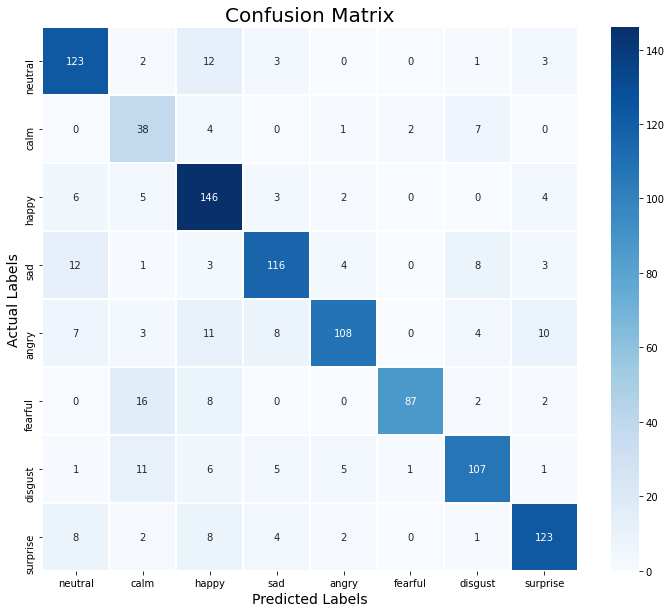

In [32]:
print("Accuracy Classifier: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print(classification_report(y_test, y_pred))
obj_model.get_confusion_matrix(y_test, y_pred, exp)